In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will be visualizing the amazon fine food review ,which we have already pre-processed and vectorized, using PCA and t-SNE by reducing their dimensionality to 2. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from scipy import sparse 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#PCA


##Visualizing bag of words vectorized reviews


In [0]:
#loading the data from which we have saved in npz format. Note PCA does NOT support sparse matrix as input data,
#hence we need to convert the input into any of the supported format(eg pandas dataframe)
X_train=sparse.load_npz("/content/drive/My Drive/Amazon fine food/Vectorized data/bow_train.npz")
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
#labels are stored in csv format. Note y_s have an additional column "Unnamed :0 "
#It was created while creating the data frame . 
y_train= np.array(pd.read_csv("/content/drive/My Drive/Amazon fine food/Vectorized data/y_train.csv").drop( 'Unnamed: 0',axis=1)) 
y_train=y_train[0:5000]

In [0]:
pca= PCA(n_components=2)
data= pca.fit_transform(X_train[:5000])

In [7]:
print(data.shape)

(5000, 2)


In [8]:
# attaching the labels to data
data=np.vstack((data.T,y_train.T)).T
print(data.shape)

(5000, 3)


In [9]:
# creating a new dataFrame for plotting purpose
pca_df = pd.DataFrame(data=data, columns=("1st principal", "2nd principal", "label"))
print(pca_df.head())

   1st principal  2nd principal  label
0       0.108963      -0.057802    1.0
1       0.057914       0.034995    1.0
2      -0.069125       0.467939    1.0
3      -0.016298      -0.088684    0.0
4       0.261258      -0.074676    1.0


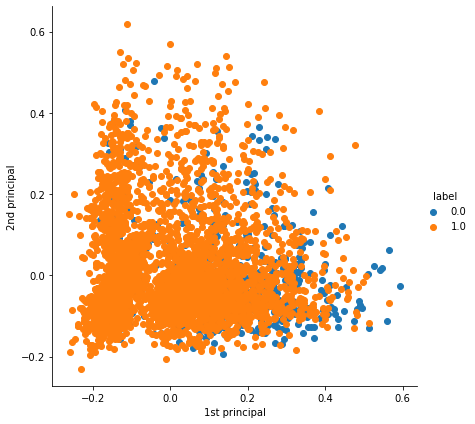

In [10]:
sns.FacetGrid(pca_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

##Visualizing tf-idf vectorized reviews

In [0]:
#loading the data from which we have saved in npz format. Note PCA does NOT support sparse matrix as input data,
#hence we need to convert the input into any of the supported format(eg pandas dataframe)
X_train=sparse.load_npz("/content/drive/My Drive/Amazon fine food/Vectorized data/tfidf_train.npz")
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)

In [0]:
data= pca.fit_transform(X_train[:5000])

In [13]:
# attaching the labels to p_data
data=np.vstack((data.T,y_train.T)).T
print(data.shape)

(5000, 3)


In [14]:
# creating a new dataFrame for plotting purpose
pca_df = pd.DataFrame(data=data, columns=("1st principal", "2nd principal", "label"))
print(pca_df.head())

   1st principal  2nd principal  label
0      -0.040642      -0.026176    1.0
1       0.005058       0.007256    1.0
2       0.084052       0.300815    1.0
3      -0.018308      -0.011873    0.0
4      -0.028426      -0.014116    1.0


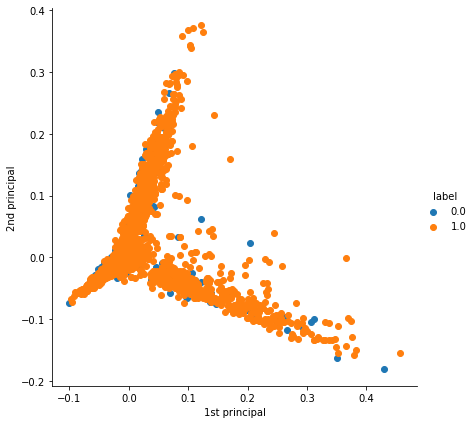

In [15]:
sns.FacetGrid(pca_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

##Visualizing word2vec vectorized reviews

In [0]:
X_train=sparse.load_npz("/content/drive/My Drive/Amazon fine food/Vectorized data/w2v_train.npz")
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)

In [0]:
data= pca.fit_transform(X_train[:5000])

In [18]:
# attaching the labels to p_data
data=np.vstack((data.T,y_train.T)).T
print(data.shape)

(5000, 3)


In [19]:
# creating a new dataFrame for plotting purpose
pca_df = pd.DataFrame(data=data, columns=("1st principal", "2nd principal", "label"))
print(pca_df.head())

   1st principal  2nd principal  label
0      -0.204572      -0.416176    1.0
1      -0.391593      -0.053641    1.0
2      -0.254483       0.413901    1.0
3       0.298750       0.223576    0.0
4       0.158986       0.000503    1.0


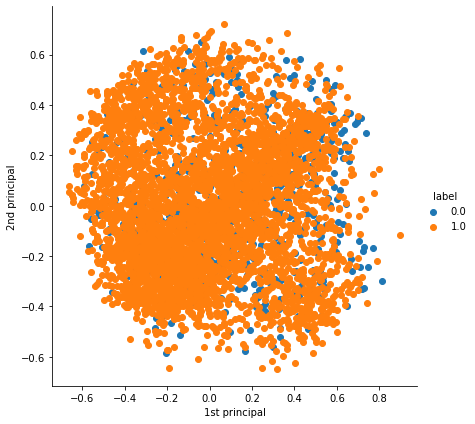

In [20]:
sns.FacetGrid(pca_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

#t-SNE

## visualizing bag of words implementation

In [0]:
X_train=sparse.load_npz("/content/drive/My Drive/Amazon fine food/Vectorized data/bow_train.npz")
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
y_train=y_train[:1000]

In [0]:
#model with perplexity = 40
# and iterations =1500
model = TSNE(n_components=2, random_state=0, perplexity= 40, n_iter=1500)

data = model.fit_transform(X_train[:1000])

In [14]:
print(data.shape)

(1000, 2)


In [15]:
# attaching the labels to data
data=np.vstack((data.T,y_train.T)).T
print(data.shape)

(1000, 3)


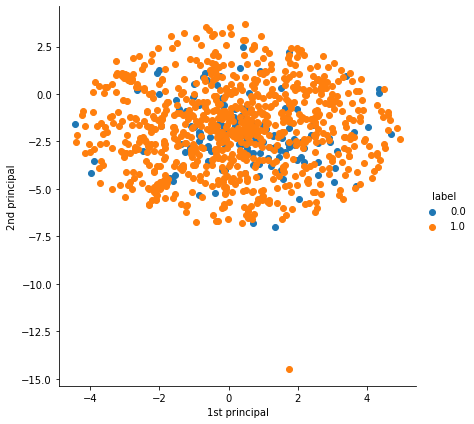

In [16]:
tsne_df = pd.DataFrame(data=data, columns=("1st principal", "2nd principal", "label"))
sns.FacetGrid(tsne_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

##Visualizing tf-idf vectorized reviews

In [0]:
X_train=sparse.load_npz("/content/drive/My Drive/Amazon fine food/Vectorized data/tfidf_train.npz")
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
y_train=y_train[:1000]

In [0]:
model = TSNE(n_components=2, random_state=0, perplexity= 40, n_iter=1500)

data = model.fit_transform(X_train[:1000])

In [19]:
print(data.shape)

(1000, 2)


In [20]:
# attaching the labels to data
data=np.vstack((data.T,y_train.T)).T
print(data.shape)

(1000, 3)


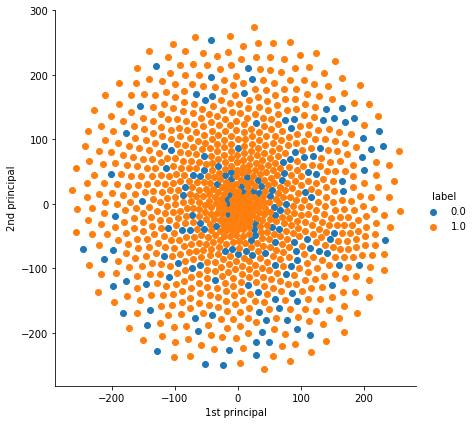

In [21]:
tsne_df = pd.DataFrame(data=data, columns=("1st principal", "2nd principal", "label"))
sns.FacetGrid(tsne_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

##Visualizing word2vec vectorized reviews

In [0]:
X_train=sparse.load_npz("/content/drive/My Drive/Amazon fine food/Vectorized data/w2v_train.npz")
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)


In [0]:
model = TSNE(n_components=2, random_state=0, perplexity= 40, n_iter=1500)

data = model.fit_transform(X_train[:1000])

In [25]:
# attaching the labels to data
data=np.vstack((data.T,y_train.T)).T
print(data.shape)

(1000, 3)


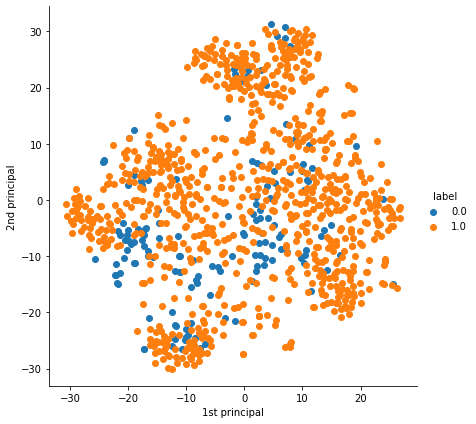

In [26]:
tsne_df = pd.DataFrame(data=data, columns=("1st principal", "2nd principal", "label"))
sns.FacetGrid(tsne_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()